# Coding Project - Watermark

Write code to automatically add a watermark to a photograph.

<img src='./ex_wm.jpg' width="500px" />

## Main requirements

The minimum requirements are to:
* Add the white pixels from the watermark somewhere in the photograph.
* Save the resulting image as an image file & display it in the notebook

You may use the *watermark.png* file available in the GitHub repository, or choose/create your own.

## Additional requirements

For extra points, you may add some possible improvements (note: this is not an exhaustive list, use your imagination!)

* Add an option to choose the watermark location
* Add transparency effect to the watermark
* Determine if the watermark should be dark or light based on the luminosity of the image
* ...


# Introduction

<br>
This project will be divided in three parts, the first will contain a brief analysis of the watermark, the second will contain the main requirements and the third the additionnal requirements. 
For the second and third part, I will each time explain the code, show the results in differents pictures and then show the code. 

# 1-Brief Analysis

<dl>
<dd>1. Here are just two functions to save the image and display it in the notebook.
</dl>

In [12]:
from skimage.io import imread,imsave,imshow
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

    
def save_im(im, filepath):
    imsave(filepath, im)
    
def display_im(im, size, title):
    plt.figure(figsize=size)
    plt.title(title)
    plt.imshow(im)
    plt.show()

### Let's check a look to the histogram of the watermark
<br>

<dl>
<dd>1. Here we simply plot the watermark and its histogram.
</dl>   

We can see that is a binary image of dimension 219 * 85 pixels. 

(85, 219)


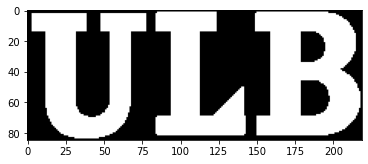

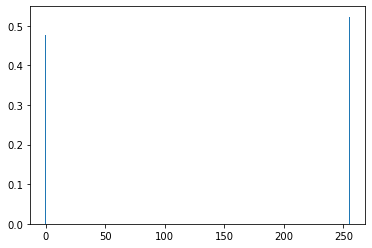

In [10]:
im_ulb = imread('watermark.png')
plt.figure()
plt.imshow(im_ulb, cmap = cm.gray)
print(im_ulb.shape) 
hist,bins = np.histogram(im_ulb.flatten(),range(257), density = True) 
plt.figure()
plt.bar(bins[:-1],hist)
plt.show()

# 2-Main requirements

### Explanation

In this part, we will focus on the main requirements. Let's decribe the process into a few steps : <br>

<dl>
<dd>1. I load the watermark and the image I want to put it on. </dd> <br>
<dd>2. I define some variable midx and midy that define the middle of the image, by definition in this part we will put the watermark on the center of the image </dd> <br> 
<dd>3. I create 4 variables that represents the distance from a reference point point in each direction (left, right, up, down), it actually makes a rectangle where the reference point is defined as the center of image. </dd> <br>
<dd>4. If the dimension of the watermark is bigger than the image, the watermark goes into a function that resize it (the resize is done using multiple of 2) and change the value of the variables defined in the previous point. This way, you can put the watermark on any image, no matter its dimension. The use of the watermark isn't dependant on the image size. By example, you can put the watermark in a very small logo, it will work. I don't use a specific library for resizing the image.</dd> <br> 
<dd>5. I choose the color of the watermark, it can take a value from 0 (black) to 255 (white) in gray levels.</dd> <br>
<dd>6. I make a loop that is going to iterate through each pixel of a rectangle centered in the center of the image. The dimension of the rectangle are defined in the point 3. The rectangle size is actually the size of the watermark. </dd> <br>
<dd>7. As the rectangle has the dimension of the watermark, for each iteration I check the value of the pixel in the watermark that match the pixel in the rectangle I iterate in the image. If the value is 255, it means that it is a pixel that belongs to the letters "ULB", So I simply remplace the value of the pixel corresponding in the image by the color chosen. After doing that for each pixel, the letters ULB appears on the image with the desired color.(NB : I check before if it is a color image or not ; for a color image I replace the value of each channel R,G and B by the color chosen so even if it is a color image, the ULB is only in gray level. For a gray level image, I just replace the value of the pixel by the color chosen). </dd> <br>
<dd>8. Then I simply display and save the image.
</dl> 

### Result

Here is the result for the image given with black and grey watermark 
<img src='./Main requirements-IMBASE_WHITE.jpg' width="500px" />
<img src='./Main requirements-IMBASE_BLACK.jpg' width="500px" />

Here is the result if we use the image of the cameraman

<img src='./Main requirements-camera.jpg' width="500px" />



Here is the result if we use my own picture 

<img src='./Main requirements-profile.jpg' width="500px" />

As you can see below, it also works for a image that is smaller than the watermark (75 * 57 here). 
<img src='./Main-requirement_small.jpg' width="500px" />



In [29]:
def resize_watermark(im, im_ulb):
    h_resize = (im_ulb.shape[0]//im.shape[0])+1
    w_resize = (im_ulb.shape[1]//im.shape[1])+1
    print(h_resize, w_resize)
    print (im_ulb.shape)
    im_ulb_resize = np.zeros((im_ulb.shape[0]//h_resize, im_ulb.shape[1]//w_resize)) #resize issue
    im_ulb_resize= im_ulb[0:-1:h_resize,0:-1:w_resize]
    print(im_ulb_resize.shape)
    
    height_ulb = im_ulb_resize.shape[0]
    width_ulb = im_ulb_resize.shape[1]
    print(height_ulb, width_ulb)
    h_up = height_ulb//2
    h_down = height_ulb//2
    if (h_up + h_down < height_ulb):
        h_up +=1

    print (h_up, h_down)
    w_left = width_ulb//2
    w_right = width_ulb//2

    if (w_left + w_right < width_ulb):
        w_left +=1
    print(w_left)
    print(w_right)

    return im_ulb_resize,h_down, h_up, height_ulb, width_ulb, w_left, w_right

<IPython.core.display.Javascript object>


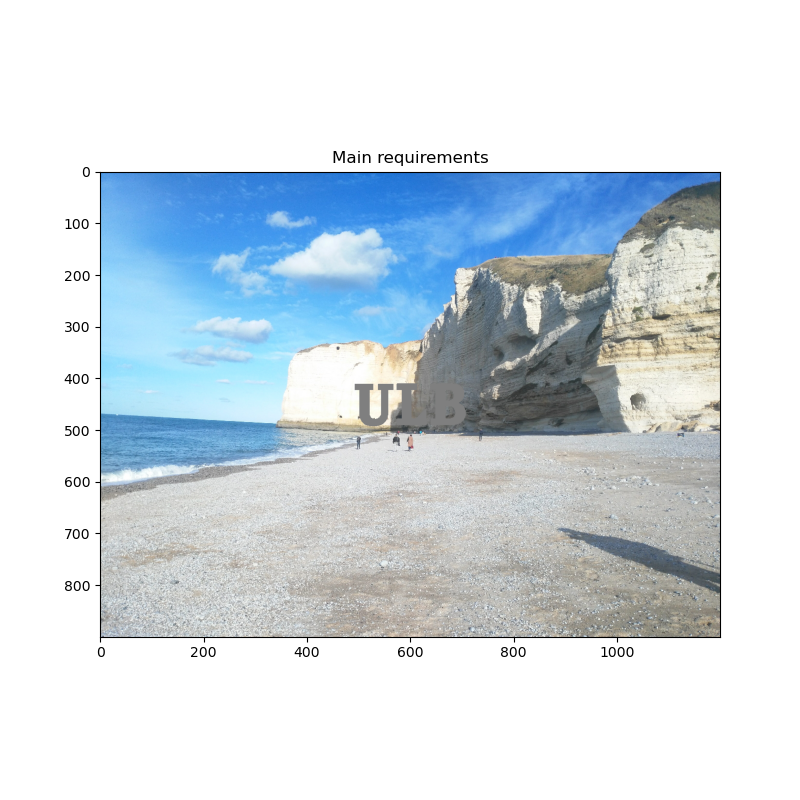

In [51]:
im_ulb = imread('watermark.png')
im = imread('etretat.jpg')

midx_im = im.shape[1]//2
midy_im = im.shape[0]//2

height_ulb = im_ulb.shape[0]
width_ulb = im_ulb.shape[1]

h_up = height_ulb//2
h_down = height_ulb//2

if (h_up + h_down < height_ulb):
    h_up +=1
    
w_left = width_ulb//2
w_right = width_ulb//2
if (w_left + w_right < width_ulb):
    w_left +=1



if ((im_ulb.shape[0]//im.shape[0]) !=0  and (im_ulb.shape[1]//im.shape[1]) !=0):
    im_ulb, h_down, h_up, height_ulb, width_ulb, w_left, w_right = resize_watermark(im, im_ulb)

    
color_water_mark = 127 #255 means white, 0 means black (#Enter value between 0 and 255)

    
for y in range(midy_im-h_down,midy_im+h_up,1):
    for x in range(midx_im-w_left,midx_im+w_right,1):
        pixel_value = im_ulb[y-(midy_im-h_down),x-(midx_im-w_left)]
        if (pixel_value == 255):
            if (im.ndim == 2):
                im[y,x] =  color_water_mark
            else:
                for z in range(im.shape[2]):
                    im[y,x,z] =  color_water_mark
                
display_im(im, (8,8), "Main requirements")
save_im(im, 'Main requirements.jpg')


# Additional requirements

* Choose location with an ONCLICK LISTENER
* Choose the relative size of the watemark 
* Choose the transparency
* Determine if the watermark should be dark or light based on the luminosity of the image


### /!\ To use the OnClick Event you will need to add "%matplotlib notebook" before displaying the image and calling the function.

In this part, we will focus on the additionnal requirements. Let's decribe the process into a few steps : <br>

## Explanation
<br>
<dl>
    <dd>1. First of all, I enter a resize pourcentage value then I resize the watermark image based on that value. If the value is 0.5, the watermark will have a width of 50% of the image. The height is resized proportionnaly to the width. For that purpose, I use a library "from skimage.transform import resize" (Source : https://stackoverflow.com/questions/48121916/numpy-resize-rescale-image). I tried to code it, it works when multiplying the shape by 2 but it was hard to generalize to any given real number so I just used the library. </dd> <br>
    <dd>2. To choose the location, I used a OnClickListener on the image. It simply triggers the function "onclick" when you click somewhere on the image. When you click on a point, it become the center of the watermark (if no borders too close). Computing is done in the onclick function. Unfortunatelly, using this function doesn't allow you to both clicking on the image and to print value in the console. </dd> <br>
    <dd>3. After clicking on the image, I get automatically the x and y coordinates of the clicked point. </dd> <br>
    <dd>4. I define the variables (like in the Main Requirements) that define a rectangle. I don't give any center of the rectangle for the moment. </dd> <br>
    <dd>5. The x and y chosen coordinates become the center of the watermark if there is no borders too close. The x and y chosen goes into a "correct_location" function to handle the cases where the center of the watermark is too close from the border. If the x and/or y coordinates are too close from the border, they will be moved away from the border to the nearest possible location that isn't in contact with the border. </dd> <br>
    <dd>6. After that I choose the color of the watermark (still grey levels) based on the brightness of the image. To do that, I simply did the average of the sum of every R,G,B pixel and divided it by the dimension of the image to get a number between 0 and 1. Then, I multiplied this number by 255 to get a value between 0 (black) and 255 (white). <br>
        -->There are better way to calculate the brightness, for that check out this link : https://stackoverflow.com/questions/6442118/python-measuring-pixel-brightness. <br>
[See last image of the results] A issue of applying the watermark based on the brightness is that if the image is completly dark, you will put a dark watermark, so you won't see it. To avoid this issue, you could take the complentary of the value you have so that your watermark will be white if you image is black. The problem with that is that the watermark will no longer fit in the image like it was taken with the original image. </dd> <br>
        <dd>7.  After that, I made a transparency effect going from 0 to 100%, the way it works is very simple ; it is a weighted average between the color you choose for the watermark and the pixel color from the image itself. This way, a constant value is added to every pixel value matching the watermark rectangle depending on the transparency. As it is an weighted average, the maximum is 255 and the minimum is 0. Plus, a brighter pixel will still be proportionnaly brighter than the others thanks to the weighted average as it proportionnaly conserve a part of it's value. 
</dl>        
<br>
I must admit when the watermark is bigger than half of the image size there is a border trouble. Its due to the function "correct_location" where I would need to add more case to deal with it. I shall correct it if I must use this code for a other project ! 

## Results

Let's test the result, we can see that we can put the watermark anywhere (even in the border) by simply clicking on the image at the position we want. It works with all kind of image, I used the beach, the cameraman and myself to try it. We can see the transparency and the color. We can also see that the color depends on the brightness of the image.
<img src='./res_6.jpg' width="500px" />
<img src='./res_3.jpg' width="500px" />
<img src='./res_1.jpg' width="500px" />


Here we can see the resize of the watermark, the watermark width is 25% for the three images. The height is modified to keep the ratio between width/height intact so there is no deformation.
Thanks to this functionnality, if you are a company that wants to put its watermark on different pictures, the watermark will proportionnaly take the same area if you choose the same pourcentage (here 25%). You can see the result here, the two watermark takes the same place in the image even if they have different resolution

<img src='./res_3.jpg' width="500px" />
<img src='./res_2.jpg' width="500px" />
<img src='./res_1.jpg' width="500px" />

You can see here that I can change the watermark size and that it be a lot bigger in the following image

<img src='./res_5.jpg' width="500px" />

Here we can see an "artefact" that is produced because the color is chosen with average brightness of the image.
<img src='./artefact.jpg' width="500px" />

As a matter of fact, the ULB (in the right below) is almost invisible. It is due to the fact that the grass color is pretty steady and has a high weight in the averaged sum of the pixel intensity, so the color associated to the brightness match more and less the grass color making the watermark almost invisible. It is also due to the fact that the transparency amplifies this effect.
It is good if your goal is to see the less possible the watermark but if you still want it to be seen pretty well, you might use the complementary of the returned color based on brightness, which is (255 - color). It will give more contrast to the image. 

This artefact is also visible here : 

<img src='./artefact_2.1.jpg' width="500px" />

As a matter of fact, the image is almost entirely white so the ulb is almost invisible.

In [1]:
from skimage.io import imread,imsave,imshow
import numpy as np
from matplotlib import pyplot as plt



def get_color_from_brightness(im):
    
    if (im.ndim != 2):
        R = im[:,:,0]
        G = im[:,:,1]
        B = im[:,:,2]

        brightness= ((np.sum(R)/3 + np.sum(G)/3 + np.sum(B)/3)/(255 * im.shape[0] * im.shape [1])) #divided by 255 to normalize between 0 and 1
        return int(255*brightness) 
    brightness= (np.sum(im))/(255 * im.shape[0] * im.shape [1]) #divided by 255 to normalize between 0 and 1
    return int(255 * brightness)

def resize_im(im, resize_n):
    from skimage.transform import resize
    resize_n = resize_n
    im_ulb = imread('watermark.png')
    w = resize_n * im.shape[1]
    r_w = w/im_ulb.shape[1]
    h = im_ulb.shape[0] * r_w
    bottle_resized = resize(im_ulb, (int(h),int(w)))
    return bottle_resized


def save_im(im, filepath):
    imsave(filepath, im)
    
def display_im(im, size, title):
    plt.figure(figsize=size)
    plt.title(title)
    plt.imshow(im)
    plt.show()
    
def onclick(event):
    
   
    y_chosen =int(event.ydata)
    x_chosen =int(event.xdata)
    
    im_ulb = im_ulb_w.copy()
    im_c = im.copy()


    
    height_ulb = im_ulb.shape[0]
    width_ulb = im_ulb.shape[1]
    h_up = height_ulb//2
    h_down = height_ulb//2
    if (h_up + h_down < height_ulb):
        h_up +=1

    w_left = width_ulb//2
    w_right = width_ulb//2

    if (w_left + w_right < width_ulb):
        w_left +=1

            
    x_chosen, y_chosen = correct_location(x_chosen, y_chosen)  #add condition si image shape/2 < que l'image watermark
  
 
        
    transparency_intensity =0.4 #Enter value between 0 and 1
    
    color_to_choose = get_color_from_brightness(im_c)
    
    
    for y in range(y_chosen-h_down,y_chosen+h_up,1):
        for x in range(x_chosen-w_left,x_chosen+w_right,1):
            pixel_value = im_ulb[y-(y_chosen-h_down),x-(x_chosen-w_left)]
            if (pixel_value == 255): 
                if (im_c.ndim == 2):
                    im_c[y,x] =  (1-transparency_intensity) * color_to_choose + transparency_intensity * im_c[y,x]
                else:
                    for z in range(im.shape[2]):
                        #color_to_choose = int (((im_c[y,x,0] + im_c[y,x,1] + im_c[y,x,2]))/3)
                        im_c[y,x,z] =  (1-transparency_intensity) * color_to_choose + transparency_intensity * im_c[y,x,z]
    ax.imshow(im_c)
    save_im(im_c, 'Additionnal_Requirements.jpg')
    
def correct_location(x,y):
   
    if (x  > width_ulb/2 +1 and x <  (im.shape[1]- (width_ulb/2)-1) 
        and  y > height_ulb/2 +1 and y <  (im.shape[0]- (height_ulb/2)-1) and 
       height_ulb > im.shape[0]//2 or width_ulb > im.shape[1]//2):
        return x,y
    if (x < ((width_ulb/2) +1)):
        x = ((width_ulb//2) +1)
    if (x > im.shape[1]- (width_ulb/2)-1):
        x = im.shape[1]- (width_ulb//2)-1 
    if (y < height_ulb/2 +1):
        y = height_ulb//2 +1 
    if (y > im.shape[0]- (height_ulb/2)-1):
        y = im.shape[0]- (height_ulb//2)-1 
    if (height_ulb > im.shape[0]//2):
        y = im.shape[0]//2
    if (width_ulb > im.shape[1]//2):
        y = im.shape[1]//2
    return x,y


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<IPython.core.display.Javascript object>


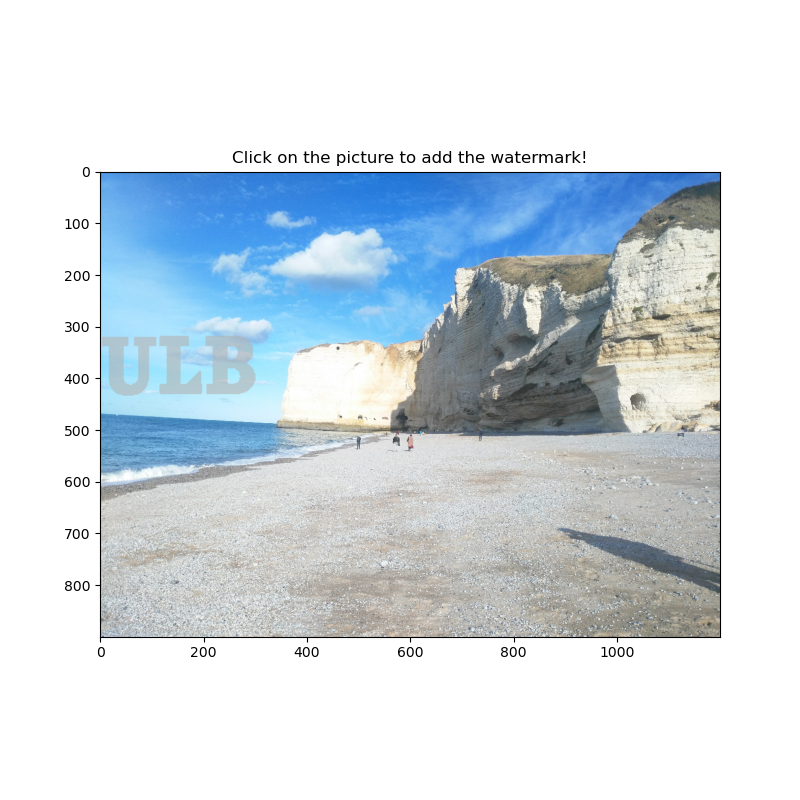

In [69]:
im_ulb_w = imread('watermark.png')
im = imread('etretat.jpg')

resize_pourcentage = 0.25 #Enter value between 0 and 1
im_ulb_w= resize_im(im, resize_pourcentage)
im_ulb_w[im_ulb_w > 0] = 255  #the resize library put value between 0 and 1 so I just put them back to 255
height_ulb = im_ulb_w.shape[0]
width_ulb = im_ulb_w.shape[1]
print(im_ulb_w)

#Simply click on the image and the watermark appears where you click ! 

%matplotlib notebook
fig = plt.figure(figsize=[8,8])
ax= fig.add_subplot(111)
ax.imshow(im)
ax.set_title("Click on the picture to add the watermark!")
text=ax.text(0,0, "", va="bottom", ha="left")
cid = fig.canvas.mpl_connect('button_press_event', onclick)